In [1]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report


from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

import pandas as pd
import os
import numpy as np
!pip install phrasemachine
!pip install rake_nltk 
from rake_nltk import Rake
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
import gensim

nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

import pickle
import seaborn as sns

!pip install pyLDAvis
import pyLDAvis
pyLDAvis.enable_notebook()

     |████████████████████████████████| 2.7 MB 13.1 MB/s 
  Created wheel for phrasemachine: filename=phrasemachine-1.0.7-py3-none-any.whl size=2694883 sha256=7511d6205f3b9cdf191bc20abc4c553d46cb8403bd1ab4068256b59b3f28096a
  Stored in directory: /root/.cache/pip/wheels/49/d9/e6/e8948b0664fc1e5135444099525ae3f67cebc0bcddf0a7b453
Successfully built phrasemachine
     |████████████████████████████████| 1.5 MB 13.8 MB/s 
     |████████████████████████████████| 749 kB 71.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 1.7 MB 13.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 33.9 MB/s 
     |████████████████████████████████| 15.7 MB 81.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=d46d7d30baa3e1c99c134fed2a1524da804401925a2c2c372d1af2318e3e5d3c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read in class corpus csv into python
df=pd.read_csv('/content/train.csv')

In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [10]:
data=pd.read_csv('../content/train.csv')


In [ ]:
#path_to_file='/content/drive/MyDrive/Chromebook DESK/NU MSDS/453 Natural Language/453_Sec56_Class_Corpus_v2.csv'
#docids,titles,text=get_corpus(path_to_file)
#print(titles)

# Function used to clean text, tfidf, d2v and cluster


In [11]:


def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    # prepare regex for char filtering 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    # word stemming    
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]
    return tokens



In [12]:
# Function used to create final processed text (string of tokens)
def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

In [13]:
# Function to create a tf-idf tdm matrix

def tfidf(text, target, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range=(1,1))

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

In [14]:
# Function to create Word2Vec Matrix

def word2vec(processed_text, size = 100):
    #This is a function to generate the word2vec matrix. Input parameters include the 
    #tokenized text and matrix size
    
    #word to vec
    model_w2v = Word2Vec(processed_text, size=100, window=5, min_count=1, workers=4)

    #join all processed DSI words into single list
    processed_text_w2v=[]
    for i in processed_text:
        for k in i:
            processed_text_w2v.append(k)

    #obtian all the unique words from DSI
    w2v_words=list(set(processed_text_w2v))

    #can also use the get_feature_names() from TFIDF to get the list of words
    #w2v_words=Tfidf.get_feature_names()

    #empty dictionary to store words with vectors
    w2v_vectors={}

    #for loop to obtain weights for each word
    for i in w2v_words:
        temp_vec=model_w2v.wv[i]
        w2v_vectors[i]=temp_vec

    #create a final dataframe to view word vectors
    w2v_df=pd.DataFrame(w2v_vectors).transpose()
    print(w2v_df)
    return w2v_df


In [16]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['target'].tolist()

In [17]:
#############################################
#Calculates tf idf
#Edit ngram range if you like
#############################################
def tfidf(text, target, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(stop_words='english', ngram_range = ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words



In [18]:
#############################################
#Performs the k-means clustering of the tfidf matrix
#Edit the number of clusters
#############################################
def k_means_tfidf(tfidf_matrix,text,target,final_processed_text, k=10):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        #print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            #print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        #print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            #print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles

    return cluster_terms, cluster_title


# First cluster

In [23]:
tfidf_m1, terms_1 = tfidf(final_processed_text, target, (1,1))
cluster_terms_1, cluster_target_1 = k_means_tfidf(tfidf_m1,terms_1,target,final_processed_text, k=20)
cluster_1df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_target_1.items() ]))
cluster_1df

NameError: ignored

In [24]:
cluster_terms_1

NameError: ignored

In [25]:
k_list = [2, 5, 7, 19, 20, 21, 22, 23]

#silhoutte score list
sil_score1 = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_m1)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_m1, labels)
    sil_score1.append(score)

NameError: ignored

In [ ]:
score

0.09303334361323828

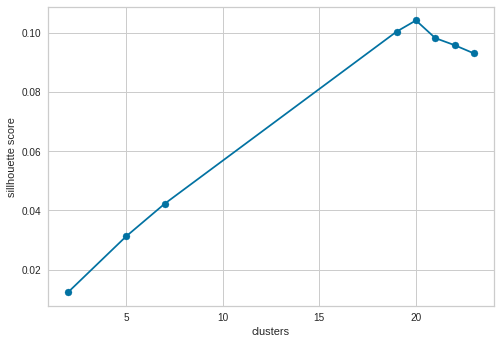

In [ ]:
#plot silhouette scores in chart

import matplotlib.pyplot as plt

plt.scatter(k_list, sil_score1)
plt.plot(k_list, sil_score1)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

In [ ]:
tfidf_m2, terms_2 = tfidf(final_processed_text, titles, (1,1))
cluster_terms_2, cluster_titles_2 = k_means_tfidf(tfidf_m2,terms_2,titles,final_processed_text, k=5)
cluster_2df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_2.items() ]))


In [ ]:
k_list = [2, 5, 7, 19, 20, 21, 22, 23]

#silhoutte score list
sil_score2 = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_m2)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_m2, labels)
    sil_score2.append(score)

In [ ]:
sil_score2

[0.012338430500398526,
 0.0311877772621172,
 0.04224613865684567,
 0.10039385253438338,
 0.104172196677548,
 0.09819614512726804,
 0.09580897198425706,
 0.09303334361323828]

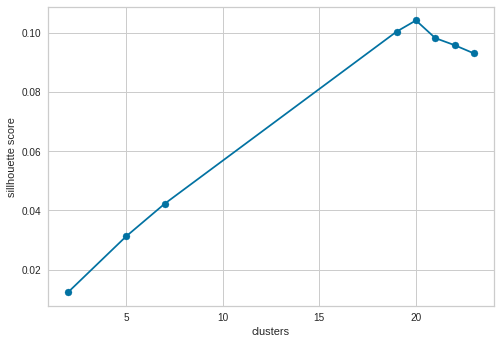

In [ ]:
#plot silhouette scores in chart

import matplotlib.pyplot as plt

plt.scatter(k_list, sil_score2)
plt.plot(k_list, sil_score2)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

AttributeError: ignored

TypeError: ignored

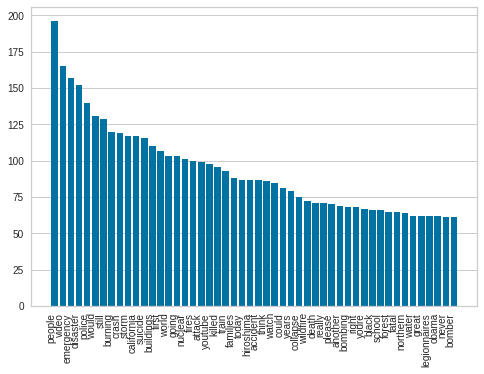

In [26]:
from yellowbrick.text import FreqDistVisualizer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(final_processed_text) ## words
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
# visualizer.show()

In [ ]:
docs

<200x15412 sparse matrix of type '<class 'numpy.int64'>'
	with 52827 stored elements in Compressed Sparse Row format>

#Part 2

In [27]:
X = df['text']
y = df['target']

In [28]:
corpus = []

for i in range(len(X)):
    #print(i)
    Text = re.sub("[^a-zA-Z]"," ", X[i])
    Text = Text.lower()
    Text = Text.split()
    Text = [word for word in Text if len(word) > 4]
    Text = [word for word in Text if word not in set(stopwords.words("english"))]
    Text = " ".join(Text)
    corpus.append(Text)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.85 , random_state=101)


In [31]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((1141, 5000), (6472, 5000), (1141,), (6472,))

In [33]:
#from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

from sklearn.svm import SVC 
exp1_SV = SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
exp1_SV.fit(X_train , Y_train)

SVC(gamma='auto', kernel='poly')

In [34]:
pred1 = exp1_SV.predict(X_test)


In [35]:
print("SVM Accuracy Score", accuracy_score(Y_test , pred1)*100)
print(confusion_matrix(Y_test , pred1))
print(classification_report(Y_test , pred1))

SVM Accuracy Score 56.891223733003706
[[3682    0]
 [2790    0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      3682
           1       0.00      0.00      0.00      2790

    accuracy                           0.57      6472
   macro avg       0.28      0.50      0.36      6472
weighted avg       0.32      0.57      0.41      6472



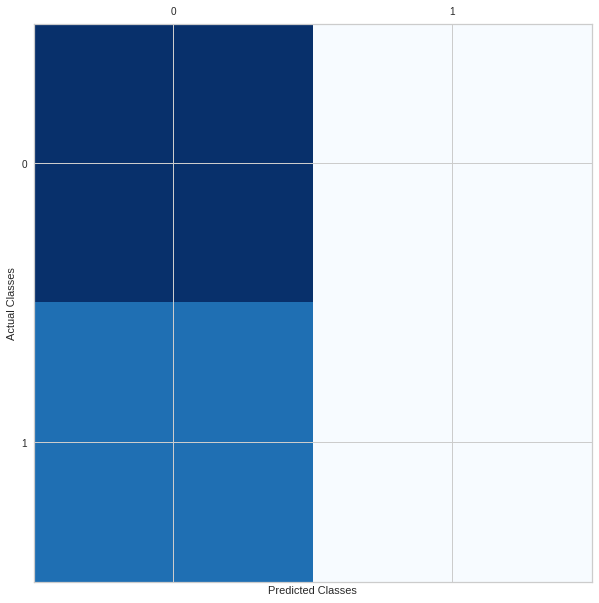

In [36]:
cf1 = confusion_matrix(Y_test , pred1)

plt.figure(figsize=(20,10))
plt.matshow(cf1, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [37]:
# negative zero, positive one
pd.DataFrame(np.c_[Y_test , pred1] , columns=["Actual" , "Predicted"])

AttributeError: ignored

      Actual  Predicted
0          0          0
1          1          0
2          0          0
3          1          0
4          1          0
...      ...        ...
6467       1          0
6468       1          0
6469       0          0
6470       1          0
6471       0          0

[6472 rows x 2 columns]

In [38]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

exp1_MNB = MultinomialNB()
exp1_MNB.fit(X_train , Y_train)

pred2 = exp1_MNB.predict(X_test)

print(accuracy_score(Y_test , pred2))
print(confusion_matrix(Y_test , pred2))
print(classification_report(Y_test , pred2))

0.7435105067985167
[[3326  356]
 [1304 1486]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      3682
           1       0.81      0.53      0.64      2790

    accuracy                           0.74      6472
   macro avg       0.76      0.72      0.72      6472
weighted avg       0.76      0.74      0.73      6472



In [39]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

exp1_LogisticRegression = LogisticRegression()
exp1_LogisticRegression.fit(X_train , Y_train)

pred3 = exp1_LogisticRegression.predict(X_test)

print(accuracy_score(Y_test , pred3))
print(confusion_matrix(Y_test , pred3))
print(classification_report(Y_test , pred3))

0.7248145859085291
[[3507  175]
 [1606 1184]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      3682
           1       0.87      0.42      0.57      2790

    accuracy                           0.72      6472
   macro avg       0.78      0.69      0.68      6472
weighted avg       0.77      0.72      0.70      6472



/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [40]:
exp1_RFC= RandomForestClassifier()
exp1_RFC.fit(X_train , Y_train)

pred4 = exp1_RFC.predict(X_test)

print(accuracy_score(Y_test , pred4))
print(confusion_matrix(Y_test , pred4))
print(classification_report(Y_test , pred4))

0.7268232385661311
[[3440  242]
 [1526 1264]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.80      3682
           1       0.84      0.45      0.59      2790

    accuracy                           0.73      6472
   macro avg       0.77      0.69      0.69      6472
weighted avg       0.76      0.73      0.71      6472



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [42]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.40 , random_state=101)


In [43]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((4567, 5000), (3046, 5000), (4567,), (3046,))

In [44]:
#from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

from sklearn.svm import SVC 
exp2_SV = SVC()
exp2_SV.fit(X_train , Y_train)

SVC()

In [45]:
pred1b = exp2_SV.predict(X_test)


In [46]:
print(accuracy_score(Y_test , pred1b))
print(confusion_matrix(Y_test , pred1b))
print(classification_report(Y_test , pred1b))

0.7774130006565988
[[1596  172]
 [ 506  772]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1768
           1       0.82      0.60      0.69      1278

    accuracy                           0.78      3046
   macro avg       0.79      0.75      0.76      3046
weighted avg       0.78      0.78      0.77      3046



In [47]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

exp2_MNB = MultinomialNB()
exp2_MNB.fit(X_train , Y_train)

pred2b = exp2_MNB.predict(X_test)

print(accuracy_score(Y_test , pred2b))
print(confusion_matrix(Y_test , pred2b))
print(classification_report(Y_test , pred2b))

0.7777413000656599
[[1519  249]
 [ 428  850]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1768
           1       0.77      0.67      0.72      1278

    accuracy                           0.78      3046
   macro avg       0.78      0.76      0.77      3046
weighted avg       0.78      0.78      0.77      3046



In [48]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

exp2_LogisticRegression = LogisticRegression()
exp2_LogisticRegression.fit(X_train , Y_train)

pred3b = exp2_LogisticRegression.predict(X_test)

print(accuracy_score(Y_test , pred3b))
print(confusion_matrix(Y_test , pred3b))
print(classification_report(Y_test , pred3b))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

0.778397898883782
[[1580  188]
 [ 487  791]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1768
           1       0.81      0.62      0.70      1278

    accuracy                           0.78      3046
   macro avg       0.79      0.76      0.76      3046
weighted avg       0.78      0.78      0.77      3046



In [49]:
exp2_RFC= RandomForestClassifier()
exp2_RFC.fit(X_train , Y_train)

pred4b = exp2_RFC.predict(X_test)

print(accuracy_score(Y_test , pred4b))
print(confusion_matrix(Y_test , pred4b))
print(classification_report(Y_test , pred4b))

0.7659225213394616
[[1534  234]
 [ 479  799]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1768
           1       0.77      0.63      0.69      1278

    accuracy                           0.77      3046
   macro avg       0.77      0.75      0.75      3046
weighted avg       0.77      0.77      0.76      3046

